In [18]:
from galpy.potential import MiyamotoNagaiPotential
from galpy.potential import NFWPotential, HernquistPotential
from galpy.orbit import Orbit
from galpy.potential import plotRotcurve
from astropy import units
import matplotlib.pyplot as plot
import numpy



In [19]:
%matplotlib inline

In [20]:
# Nomeando os potenciais utilizados
mp= MiyamotoNagaiPotential(a=0.5,b=0.0375,normalize=.6)
np= NFWPotential(a=4.5,normalize=.35)
hp= HernquistPotential(a=0.6/8,normalize=0.05)


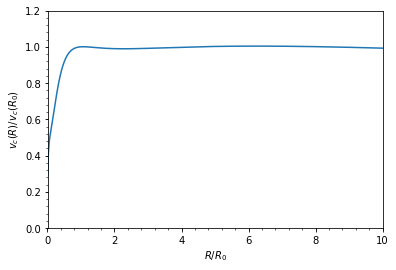

In [21]:
# Faz o gráfico da curva de rotação dos 3 potenciais combinados
plotRotcurve([np,mp,hp],Rrange=[0.01,10.],grid=1001,yrange=[0.,1.2])

# Utilizamos o tempo de integração como 1 Gyr em 1000 passos
ts= numpy.linspace(0.,1.0,1000)*units.Gyr

#   órbita        R     vR    vT    z    vz   phi
op= Orbit(vxvv=[0.875, 0.04 , 1.1 , 0. , 0.0 , 0. ],ro=8.,vo=230.) 


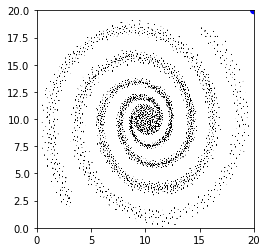

In [25]:
from scipy.misc import imread

import scipy.misc
from scipy import ndimage

import matplotlib.animation as animation

img = imread('galaxy-white.png')
fig = plot.figure()

ax = plot.axes(xlim=(0, 20), ylim=(0, 20))
first_star = plot.Circle((5, -5), 0.35, fc='blue')

def init():
    first_star.center=(20, 20)
    ax.add_patch(first_star)
    
    return first_star,


def animate(i):
    rotated_img = ndimage.rotate(img, -i, reshape=False)
    plot.imshow(rotated_img, zorder=0, extent=[0.1, 20.0, 0.1, 20.0])
    
    return first_star,

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=10, 
                               interval=20,
                               blit=True)

# plot.axis('off')

anim.save('integration.mp4', writer='ffmpeg', fps=30)
plot.show()


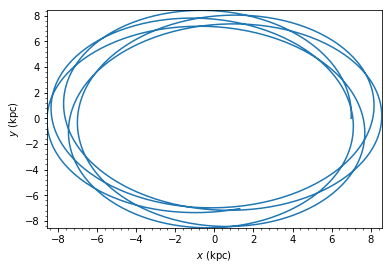

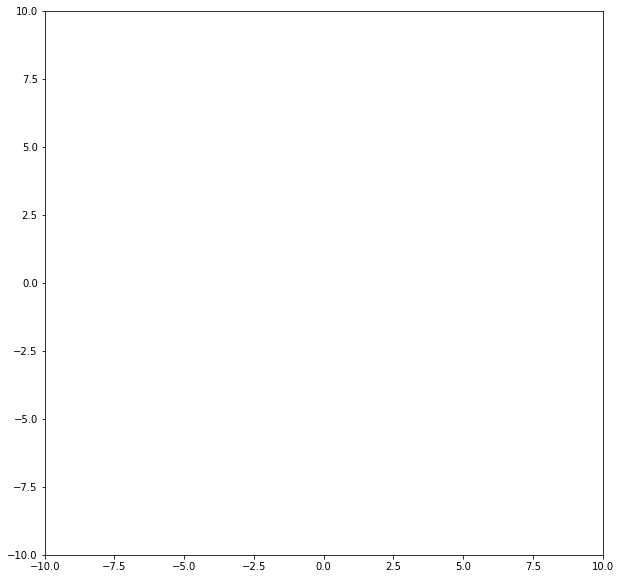

In [26]:
# Integramos em ts, nos potenciais combinados, pelo método Runge Kutta 6
op.integrate(ts,[hp,mp,np], method='rk6_c')

# Faz-se o gráfico da órbita
op.plot(d1='x',d2='y') 

plot.figure (2)

plot.xlim( -10, 10 )
plot.ylim( -10, 10 )
fig = plot.gcf()
fig.set_size_inches(10., 10.)


In [27]:
op.animate(d1='x',d2='y')

In [29]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "html5"
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
h = ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

In [30]:
ani